In [10]:
#import all useful modueles
import rasterio as rio
import os
import matplotlib.pyplot as plt
from rasterio.plot import show
import earthpy
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import numpy as np
import geopandas as gp

In [2]:
#set working directory
os.chdir('/Users/nataliergravett/PycharmProjects')

In [3]:
#function for reading in rasters
def readraster(filedir):
    with rio.open(filedir,'r') as src:
        raster=src.read()
        transform=src.transform
        
    return(raster,transform)

b5_raster, b5_transform=readraster('LS8_2020_B4_Clip.tif')
b4_raster, b4_transform=readraster('LS8_2020_B5_Clip.tif')

In [4]:
#equations for ndvi & savi
ndvi=((b5_raster.astype(float)-b4_raster.astype(float))/(b5_raster.astype(float)+b4_raster.astype(float)))
#used 0.5 for L (canopy background adjustment factor)
savi=((b5_raster.astype(float) - b4_raster.astype(float))/(b5_raster.astype(float) + b4_raster.astype(float) + 0.5)) * (1 + 0.5)

In [20]:
#creating a function for ndvi
def ndvi (b5_dir, b4_dir):
    with rio.open(b5_dir) as src:
        b5_raster=src.read()
        b5_transform=src.transform
    with rio.open(b4_dir) as src:
        b4_raster=src.read()
        b4_transform=src.transform
    ndvi=((b5_raster.astype(float)-b4_raster.astype(float))/(b5_raster.astype(float)+b4_raster.astype(float)))
    
    return(ndvi,b5_transform)

In [5]:
#creating a function for savi
def savi (b5_dir, b4_dir):
    with rio.open(b5_dir) as src:
        b5_raster=src.read()
        b5_transform=src.transform
    with rio.open(b4_dir) as src:
        b4_raster=src.read()
        b4_transform=src.transform
    savi=(b5_raster.astype(float) - b4_raster.astype(float))/((b5_raster.astype(float) + b4_raster.astype(float) + 0.5) * (1 + 0.5))
    
    return(savi,b5_transform)

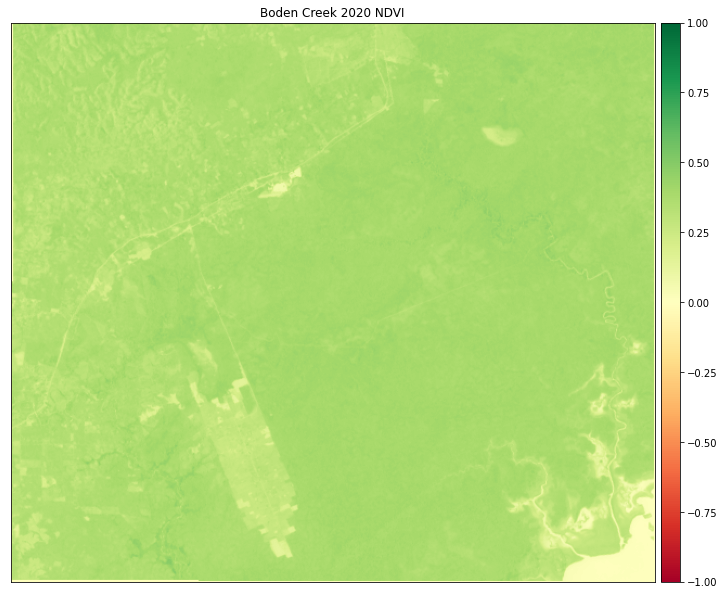

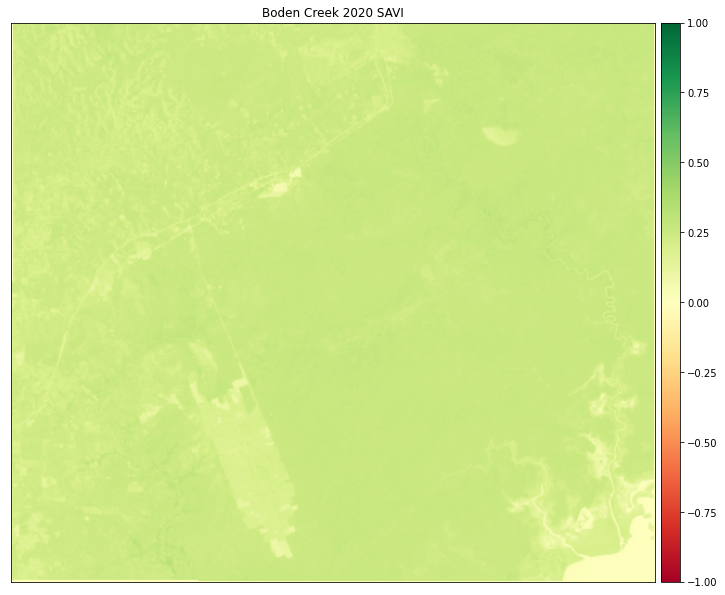

In [24]:
#plotting NDVI and SAVI with colourbars
jan2020_savi, jan2020_transform=savi('LS8_2020_B5_Clip.tif', 'LS8_2020_B4_Clip.tif')
jan2020_ndvi, jan2020_transform=ndvi('LS8_2020_B5_Clip.tif', 'LS8_2020_B4_Clip.tif')

ep.plot_bands(jan2020_ndvi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, title="Boden Creek 2020 NDVI");
ep.plot_bands(jan2020_savi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1, title="Boden Creek 2020 SAVI");

In [11]:
print(crs)

EPSG:4326


In [12]:
(3,500,600)

(3, 500, 600)

In [11]:
shape1 = gp.read_file('/Users/nataliergravett/PycharmProjects/ProjectBoundary_Shp/647_Project_Boundary.shp')

<AxesSubplot:>

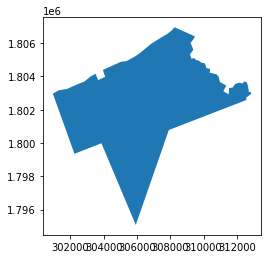

In [16]:
shape1.plot()

In [15]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


In [18]:
shape1.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 90°W to 84°W - by country
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich